In [8]:
%pip install pandas numpy matplotlib scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, math, random, time


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
SENSOR_DATA = 'recordings/donanta10.csv'
data = pd.read_csv(SENSOR_DATA)
# Convert ESP32 system time to local time so the graphs make more sense.
data['t'] = pd.to_datetime((data['time'] / 1_000_000_000.0), unit='s')
data.set_index(data['t'], inplace=True)
data

,time,gyro.x,gyro.y,gyro.z,accel.x,accel.y,accel.z,t
t,,,,,,,,
1970-01-01 00:00:00.778227,778227000,0.136221,0.269249,0.025009,3.873818,-1.103727,10.539276,1970-01-01 00:00:00.778227
1970-01-01 00:00:00.789250,789250000,0.246900,0.316075,-0.138881,4.577713,-1.345541,10.635044,1970-01-01 00:00:00.789250
1970-01-01 00:00:00.799852,799852000,0.292130,0.353855,-0.272974,5.042189,-1.520318,10.730812,1970-01-01 00:00:00.799852
1970-01-01 00:00:00.810566,810566000,0.332570,0.403874,-0.440057,5.250484,-1.587356,10.776301,1970-01-01 00:00:00.810566
1970-01-01 00:00:00.821220,821220000,0.373011,0.444314,-0.634278,5.169082,-1.606509,10.840945,1970-01-01 00:00:00.821220
...,...,...,...,...,...,...,...,...
1970-01-01 00:04:42.288823,282288823000,-0.447507,0.266589,-0.463470,4.625597,7.201759,-0.268151,1970-01-01 00:04:42.288823
1970-01-01 00:04:42.298294,282298294000,-0.234130,0.224552,-0.381525,5.372589,7.548918,-0.208296,1970-01-01 00:04:42.298294
1970-01-01 00:04:42.307698,282307698000,-0.182515,0.209652,-0.477837,5.671864,7.685388,-0.239420,1970-01-01 00:04:42.307698


In [10]:
START = 60 + 23.6
STOP = 60 + 36.6
# START = 40.5
# STOP = 45
# START = 35
# STOP = 60 + 10

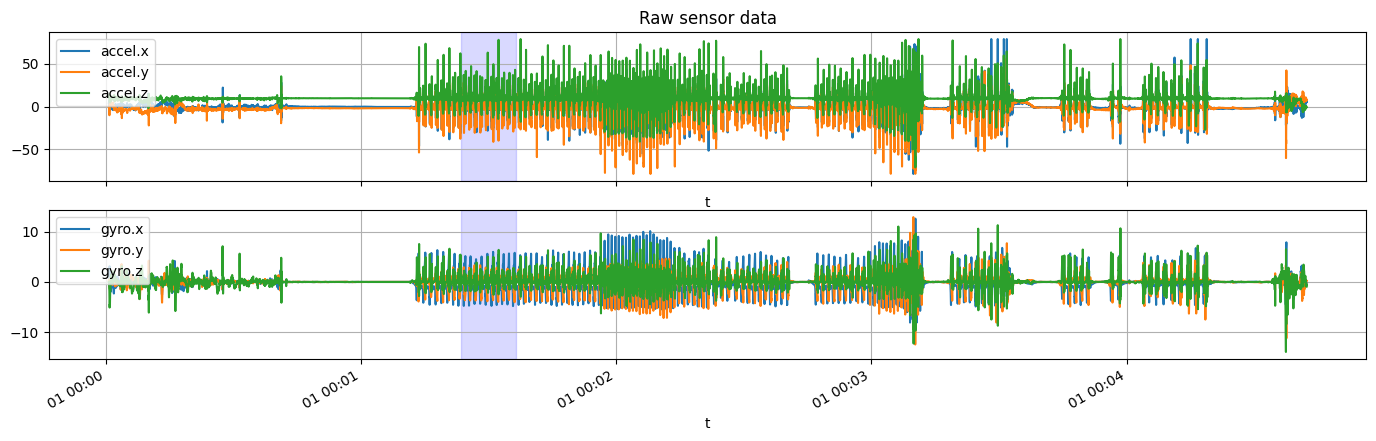

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1)

data['accel.x'].plot(ax=ax1)
data['accel.y'].plot(ax=ax1)
data['accel.z'].plot(ax=ax1)
ax1.xaxis.set_ticklabels([])
ax1.legend(loc='upper left')
ax1.grid()

data['gyro.x'].plot(ax=ax2)
data['gyro.y'].plot(ax=ax2)
data['gyro.z'].plot(ax=ax2)
ax2.legend(loc='upper left')
ax2.grid()

t_unit = 24*60*60
for ax in [ax1, ax2]:
    ax.axvspan(
        START / t_unit,
        STOP / t_unit,
        color='blue',
        alpha=0.15
    )

ax1.set_title('Raw sensor data')
fig.set_figwidth(17)

In [12]:
start_t = START * 1_000_000_000
stop_t = STOP * 1_000_000_000
sub_data = data[data['time'] > start_t][data['time'] < stop_t]

/tmp/ipykernel_14014/3440364403.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = data[data['time'] > start_t][data['time'] < stop_t]


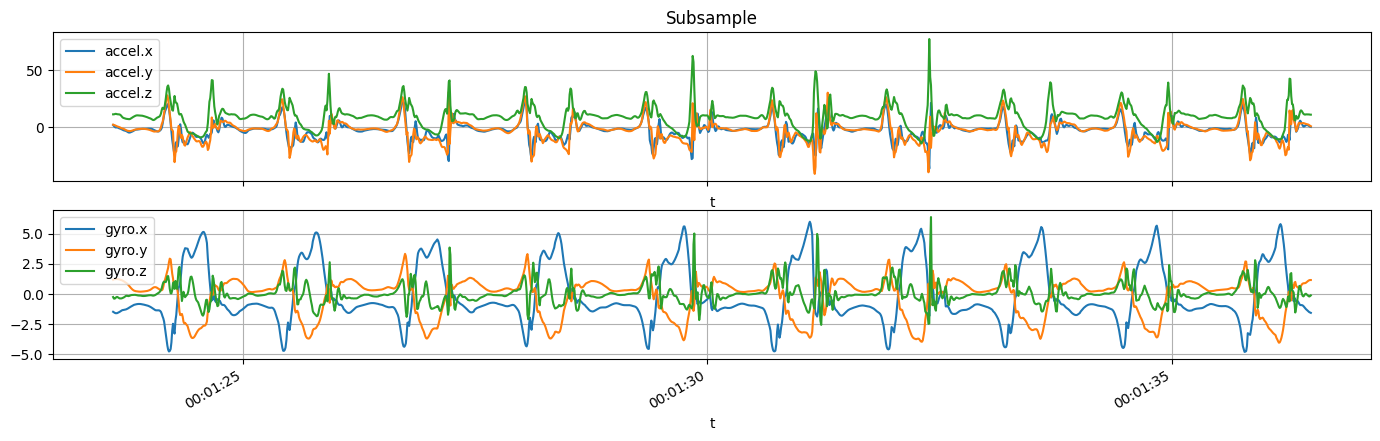

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1)

sub_data['accel.x'].plot(ax=ax1)
sub_data['accel.y'].plot(ax=ax1)
sub_data['accel.z'].plot(ax=ax1)
ax1.xaxis.set_ticklabels([])
ax1.legend(loc='upper left')
ax1.grid()

sub_data['gyro.x'].plot(ax=ax2)
sub_data['gyro.y'].plot(ax=ax2)
sub_data['gyro.z'].plot(ax=ax2)
ax2.legend(loc='upper left')
ax2.grid()

ax1.set_title('Subsample')
fig.set_figwidth(17)

In [14]:
SUBSAMPLE_DATA = SENSOR_DATA.replace('.csv', '_supsample.csv')
if SUBSAMPLE_DATA == SENSOR_DATA:
    raise Exception('About to override sensor data recording')
out = sub_data.drop(columns=['t']).reset_index().drop(columns=['t']).set_index('time')
out.to_csv(SUBSAMPLE_DATA)